In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [70]:
# Loading the data
# this is the original dataset
data = pd.read_csv('./original_dataset/risk_factors_cervical_cancer_working_dataset.csv')

In [71]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [72]:
# look at the target variables
print("Hinselmann : \n",data.Hinselmann.value_counts())
print("Schiller : \n",data.Schiller.value_counts())
print("Citology : \n",data.Citology.value_counts())
print("Biopsy : \n",data.Biopsy.value_counts())

Hinselmann : 
 0    823
1     35
Name: Hinselmann, dtype: int64
Schiller : 
 0    784
1     74
Name: Schiller, dtype: int64
Citology : 
 0    814
1     44
Name: Citology, dtype: int64
Biopsy : 
 0    803
1     55
Name: Biopsy, dtype: int64


In [73]:
# filter out some data
data = data.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],axis=1)
data = data.dropna()
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [74]:
print("Hinselmann : \n",data.Hinselmann.value_counts())
print("Schiller : \n",data.Schiller.value_counts())
print("Citology : \n",data.Citology.value_counts())
print("Biopsy : \n",data.Biopsy.value_counts())

Hinselmann : 
 0    638
1     30
Name: Hinselmann, dtype: int64
Schiller : 
 0    605
1     63
Name: Schiller, dtype: int64
Citology : 
 0    629
1     39
Name: Citology, dtype: int64
Biopsy : 
 0    623
1     45
Name: Biopsy, dtype: int64


In [75]:
# Specify target features

featuers = ["Age","Number of sexual partners","First sexual intercourse","Num of pregnancies",
"Smokes","Smokes (years)","Smokes (packs/year)","Hormonal Contraceptives","Hormonal Contraceptives (years)",
"IUD","IUD (years)","STDs","STDs (number)","STDs:condylomatosis","STDs:cervical condylomatosis","STDs:vaginal condylomatosis",
"STDs:vulvo-perineal condylomatosis","STDs:syphilis","STDs:pelvic inflammatory disease","STDs:genital herpes",
"STDs:molluscum contagiosum","STDs:AIDS","STDs:HIV","STDs:Hepatitis B","STDs:HPV","STDs: Number of diagnosis","Dx:Cancer","Dx:CIN","Dx:HPV","Dx",
"Hinselmann","Citology","Biopsy"]

In [76]:
# Split the data
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3) # Train set by 30%

In [77]:
print("Train : \n", train.Schiller.value_counts())
print("Test : \n", test.Schiller.value_counts())

# save to csv
train.to_csv("./working_data/train.csv")
test.to_csv("./working_data/test.csv")

Train : 
 0    427
1     40
Name: Schiller, dtype: int64
Test : 
 0    178
1     23
Name: Schiller, dtype: int64


In [78]:
from sklearn.metrics import accuracy_score

In [79]:
# SVM SVC
from sklearn import svm
clf = svm.SVC()
clf.fit(train[featuers], train.Schiller)

# accuracy
pred_svc = clf.predict(test[featuers])

acc = accuracy_score(pred_svc, test.Schiller)

print(acc)

0.885572139303


In [80]:
# Random forrest
from sklearn.ensemble import RandomForestClassifier

rclf = RandomForestClassifier(max_depth=6, random_state=1)
rclf.fit(train[featuers], train.Schiller)

pred_rand = rclf.predict(test[featuers])
acc = accuracy_score(pred_rand, test.Schiller)
print(acc)

0.965174129353


In [81]:
# Measures

In [82]:
# Cross validation

from sklearn.model_selection import cross_val_score

print("SVC : \n",cross_val_score(clf, data[featuers], data.Schiller, cv=5))
print("Random Forest : \n",cross_val_score(rclf, data[featuers], data.Schiller, cv=5))

SVC : 
 [ 0.90298507  0.90298507  0.90298507  0.90977444  0.90977444]
Random Forest : 
 [ 0.94776119  0.97014925  0.94029851  0.94736842  0.93984962]


In [83]:
# confusion matrix

from sklearn.metrics import confusion_matrix

y_true = test.Schiller
y_pred = pred_svc
print("SVC : \n",confusion_matrix(y_true, y_pred))

y_true = test.Schiller
y_pred = pred_rand
print("Random forrest : \n",confusion_matrix(y_true, y_pred))

SVC : 
 [[178   0]
 [ 23   0]]
Random forrest : 
 [[177   1]
 [  6  17]]


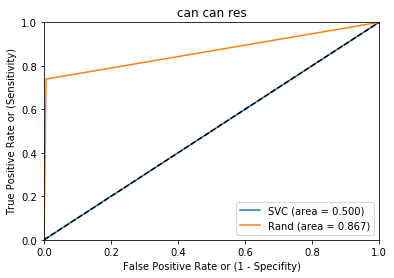

In [84]:
# ROC curve
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y = test.Schiller

fpr_svc, tpr_svc, thresholds = roc_curve(y, pred_svc)
fpr_rand, tpr_rand, thresholds = roc_curve(y, pred_rand)

# roc_auc_svc = auc(y, pred_svc,True)
# roc_auc_rand = auc(y, pred_rand,True)

roc_auc_svc = metrics.auc(fpr_svc, tpr_svc)
roc_auc_rand = metrics.auc(fpr_rand, tpr_rand)

# Plot the graph with matplotlib

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(fpr_svc, tpr_svc, label='SVC (area = %0.3f)' % roc_auc_svc)
plt.plot(fpr_rand, tpr_rand, label='Rand (area = %0.3f)' % roc_auc_rand)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('can can res')
plt.legend(loc="lower right")

In [85]:
# selected the Random forest because it made the most sense.
from sklearn.externals import joblib
joblib.dump(rclf, 'randomForestClassifier.pkl') # exporting it.

# testing it 
pred_test = [51,3,17,6,1,34,3.4,0,0,1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1]
print(rclf.predict(pred_test))

[1]


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
